# EECS531-A5
Mingxin Liu



# Background theory

- Build a simple virtual world
  rotational matrix
  gazebo model
- Camera Model
  camera calibration
  camera plotting
  color mapping with sensor
- Triangluation

## Rotational matrix


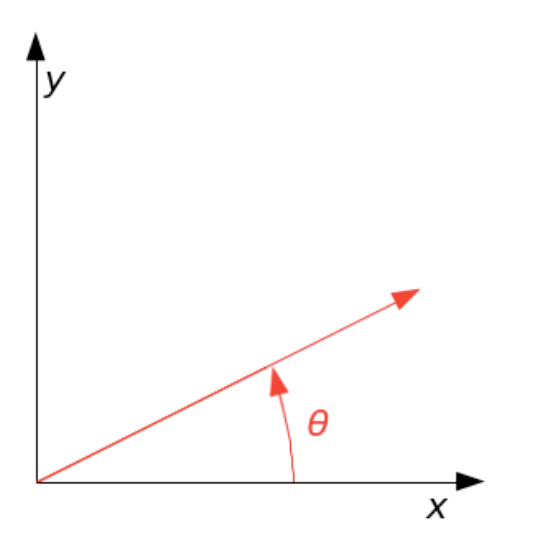


- First lets talk about rotational matrix. 

Here are two graphs show the equation how we can calculate the position of a point after rotation in space in x and y direction with angle theta. The method is basically multiples the original point in space with the rotational matrix calculated with matrix constructed with cos and sin of the angle. Since the point of rotation is a skew motion instead of linear static transformation, thus the transformation needs to consider the change in both x and y direction for a 2D transformation. 

- reason we care about rotational matrix

The reason we care about the rotational matrix is that when we try to work on intrinsic camera calibration, we ought to calculate the points in space to calibrate the accuracy of the camera vision points. To do so, we need to work with an algorithm that can check the coordinates of the points in space for camera to campare to for the sake of calibration.

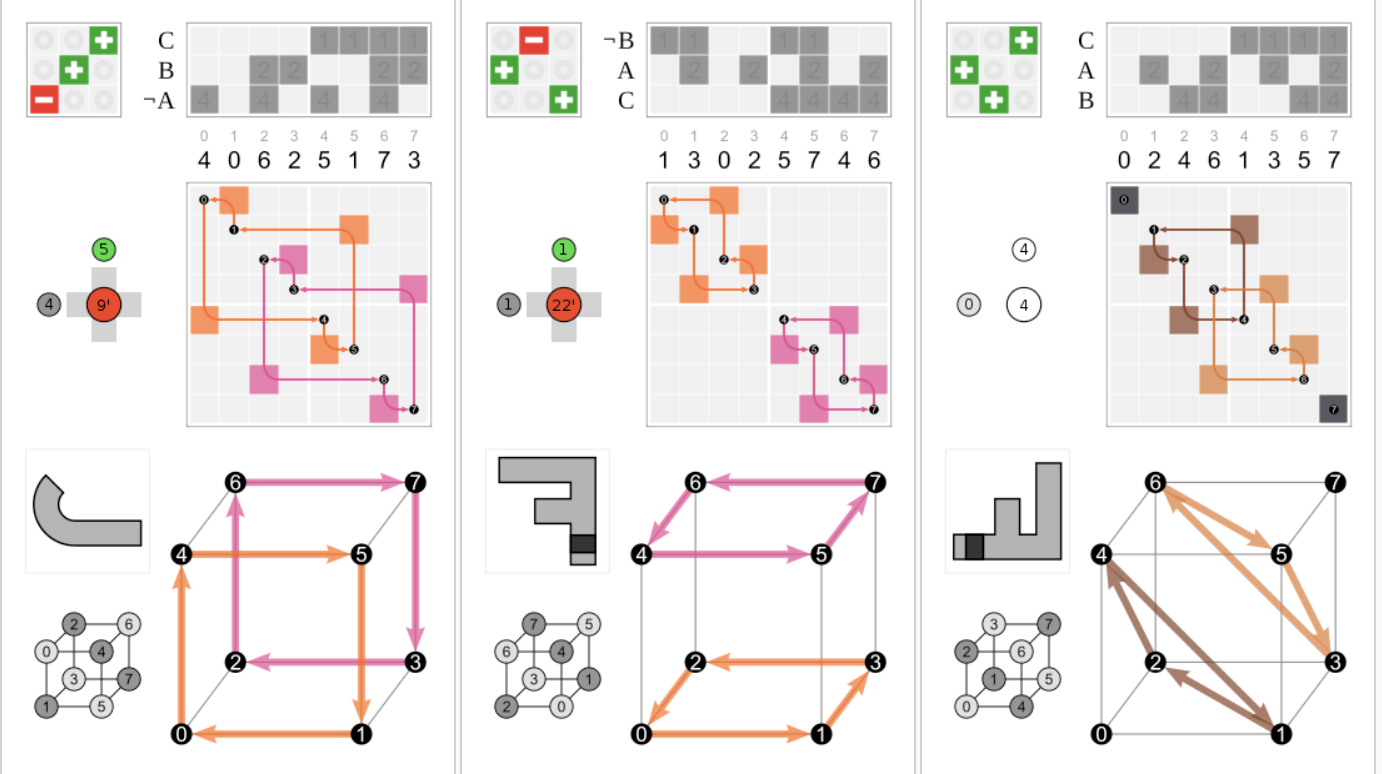

Here is an example with graph of the 3D point rotation demostration. 

- Rotation matrix is a real entried square matrix. It's usually orthogonal with determinant equals to 1. The use of rotational matrix is mainly in calculating the spatial transformation of n-degree of freedom objects with given body frames. 
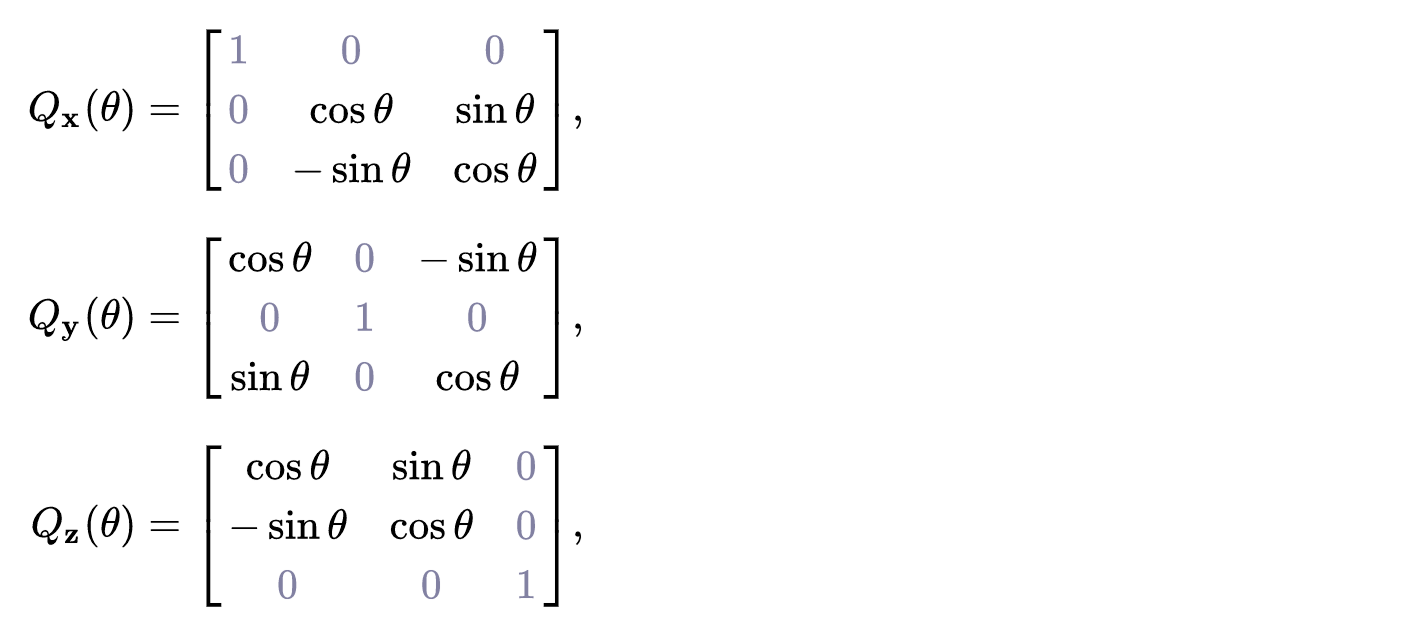

- This is a more general equation for calculating points in space in 3 dimensions. 

In [8]:
class ImageSyncher
{
  ros::NodeHandle nh_;
  image_transport::ImageTransport it_;
  image_transport::CameraSubscriber camera_sub_left_;
  image_transport::CameraSubscriber camera_sub_right_;  
  image_transport::CameraPublisher camera_pub_left_;
  image_transport::CameraPublisher camera_pub_right_;  

  sensor_msgs::Image img_left_,img_right_;
  sensor_msgs::CameraInfo info_left_,info_right_; 

  int sequence;

### ImageSyncher

Here in the code we are simply accessing library functions from openCV from Robotic operating system. The C++ code here is subscribing to a real camera for the sake of the experiement. 

In [10]:
void imageLeftCb(const sensor_msgs::ImageConstPtr& image_msg,const sensor_msgs::CameraInfoConstPtr& info_msg)
  {
         //img_left_
      int img_datasize = image_msg->data.size();
      //ROS_INFO("image data size: %d",img_datasize);

      int cpy_img_datasize = img_left_.data.size();
      if (cpy_img_datasize!= img_datasize) {
          img_left_.data.resize(img_datasize);
          ROS_INFO("resizing image");
      }


      img_left_ = *image_msg; // does this work? want to copy the data, but msg is a pointer

      int info_datasize = info_msg->D.size();
      //ROS_INFO("info data size: %d",info_datasize);
      int cpy_info_datasize = info_left_.D.size();
 
      if (cpy_info_datasize!= info_datasize) {
          info_left_.D.resize(info_datasize);
          //ROS_INFO("resizing info");
      }
      info_left_ = *info_msg; // does this work? want to copy the data, but msg is a pointer
      got_new_image_left_=true; 


  }

- Here its the callback function of the intrinsic camera calibration code. The calibration is based on two factors in this case.

- real object data with LIDAR pcl prediction
- height estimate with the angle tilted in front of the robot. 
### result of the calibration

- This is a view of the robot in the view of Gazebo virtual simulation. Instead of viewing the camera from a GUI from Matlab, we can instead build a logic camera model in Gazebo and calibrate it accordingly. 

In [12]:
var len1 = set1.length;
//var len2 = set2.length;
var scale = d3.scale.linear()
.domain([0, n])
.range([0, 316342243]);


- Initializng the values for scale and range.
Then input the values with the range for the color mapping


In [11]:

function color() {
  int code = scale(d);
  a = code >> ashift
  //var b = code >> bshift
  var ind1 = Math.floor(code % (len1-1));
  //var ind2 = b & (len2-1);
  var col1 = set1[ind1];
  //var col2 = set2[ind2];
  return col1
}
var svg = d3.select("svg");



var codes = d3.range(n);
var gs = svg.selectAll("g.identicon")
.data(codes)
.enter()
.append("g").classed("identicon", true)
.attr("transform", function(d,i) {
  var x = (w+5) * (i % nx);
  var y = (h+5) * Math.floor(i / nx)
  return "translate(" + [x, y] + ")";
})
    return color(d)
  }
}

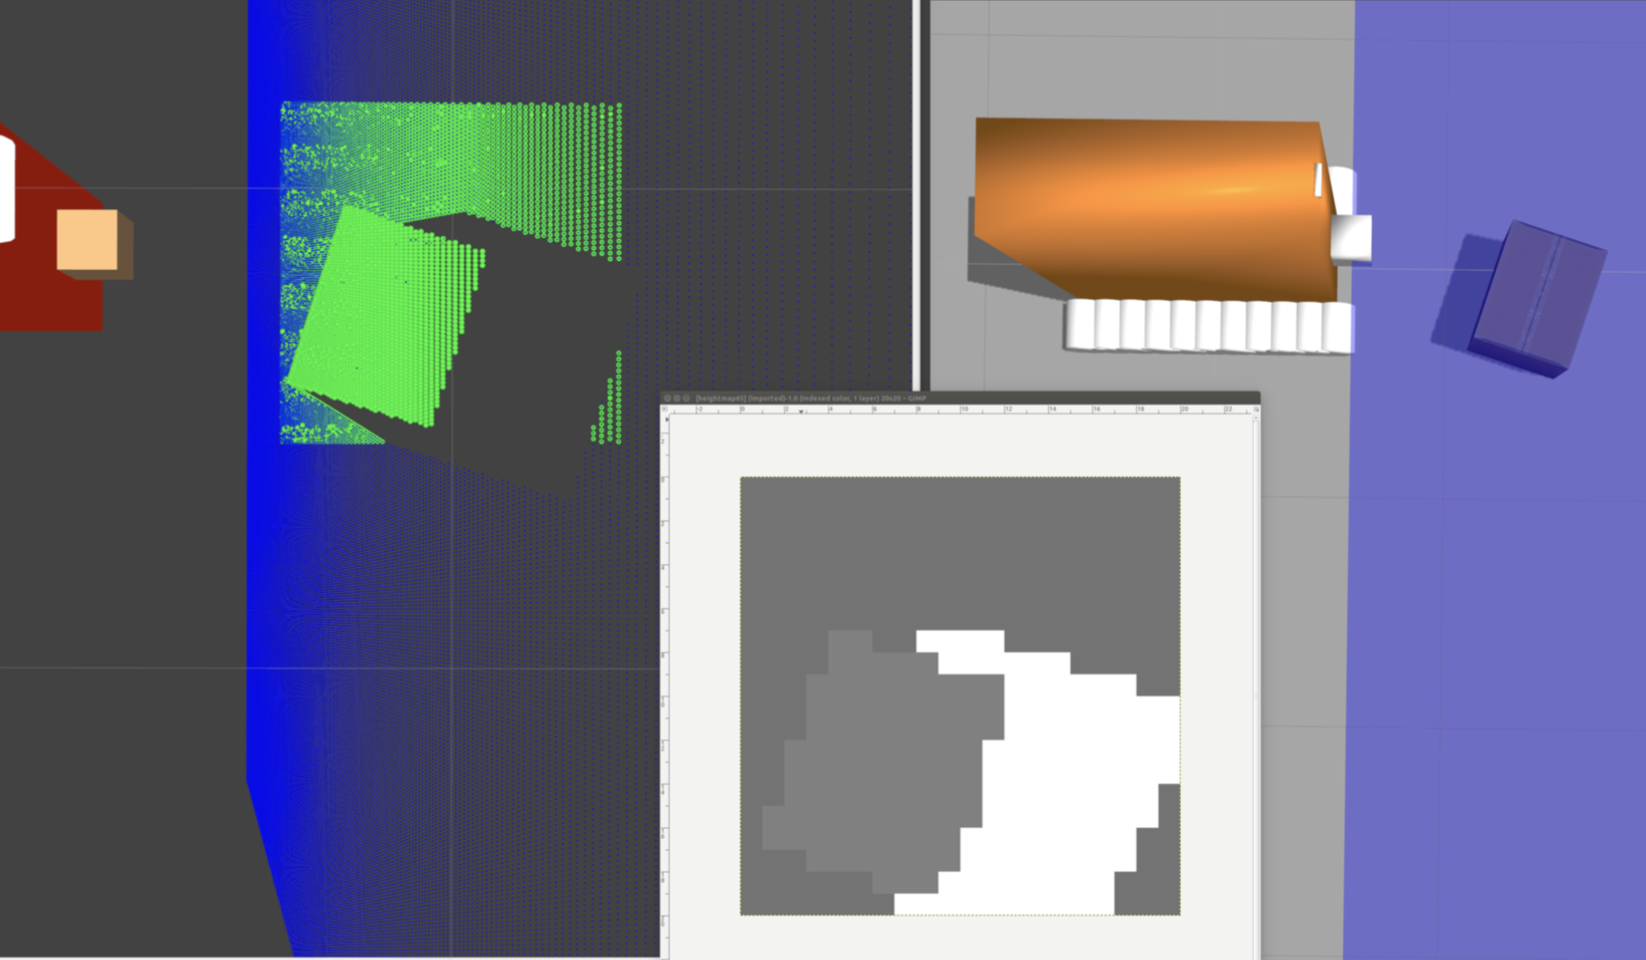

- The first result shows that in the intrinsic calibration, the color mapping can be seen on the botton of the plot. The position and orientation are matching with the LIDAR data output for the kinect camera calibration in this case. 

- however, another issue is that although the static position might be alligning with the real object in space, but its actual position might be skewed due to ground level change.

- In order to fix this issue, we apply the next method to fit the skewed object in space.

As the graph shown down below, the robot is tilted up due to the unleveled ground. Therefore, the orientation of the percieved object in the z direction is off by the angle titled upwards. 

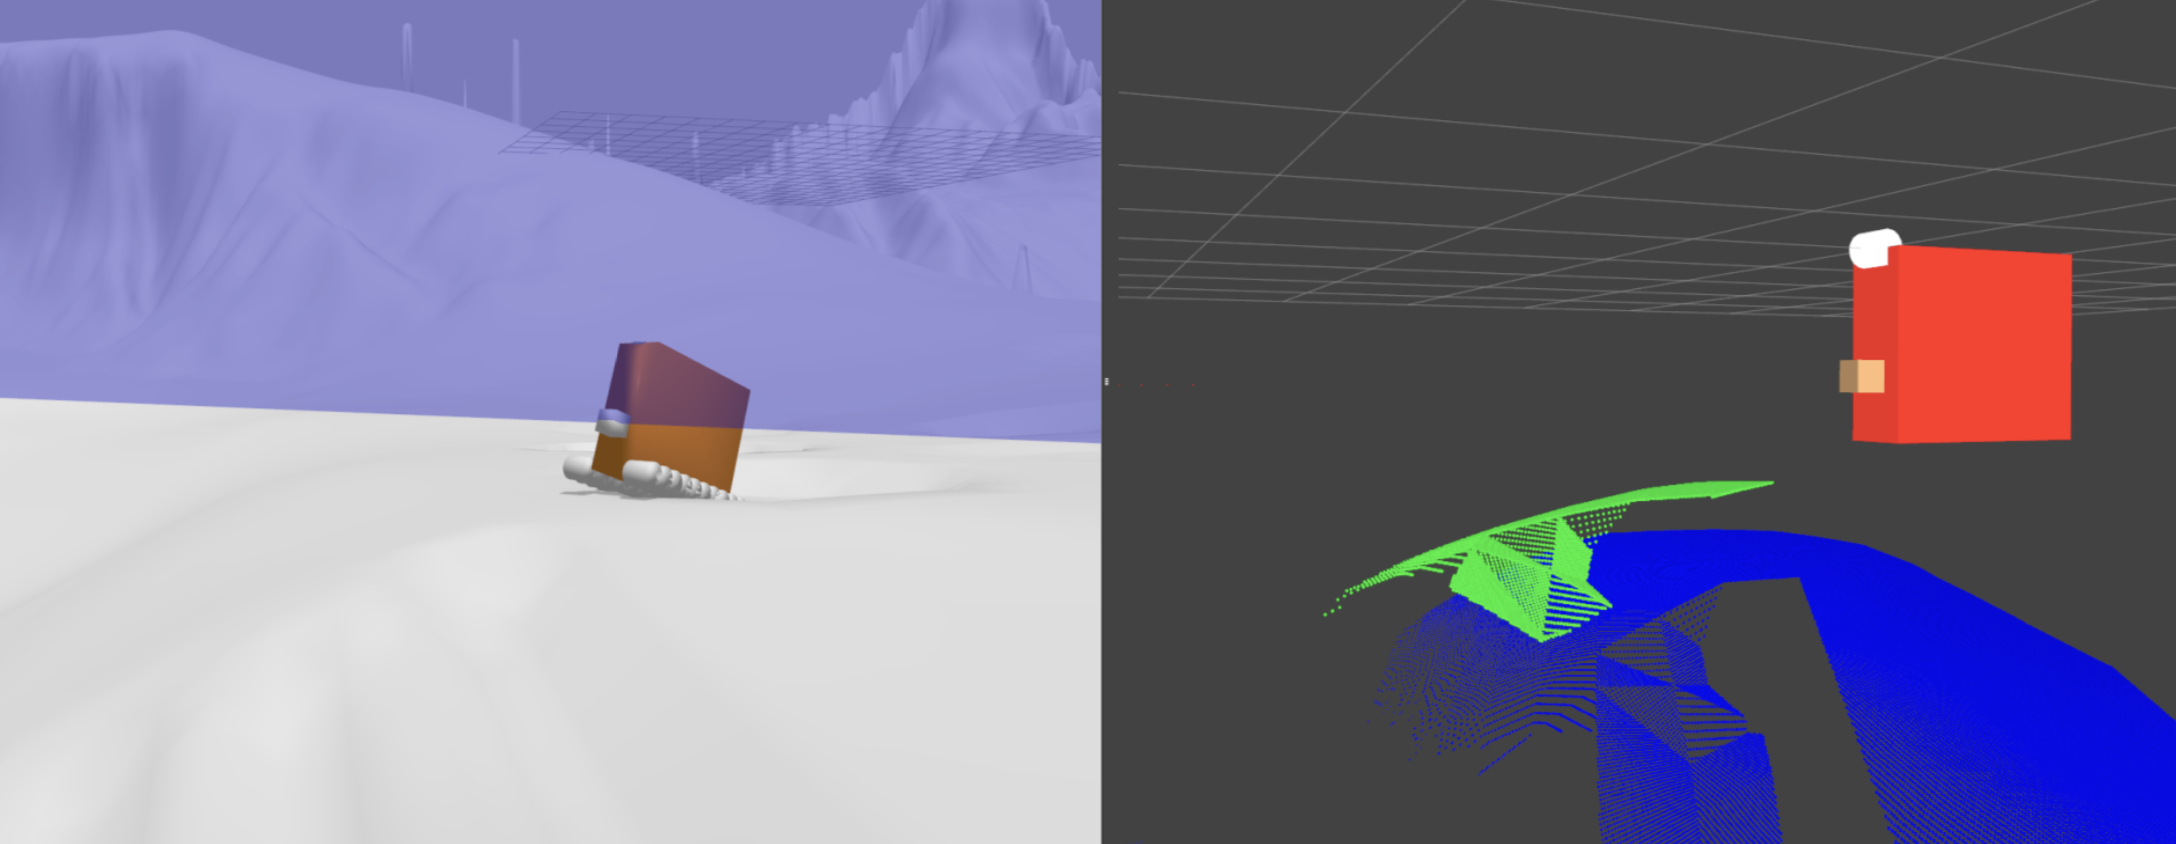

- The wobbling LIDAR mounted on the top front of the robot can fix this issue by giving point cloud views in the z direction. The sick lidar tells only the point cloud information in x and y direction, so it's unable to tell the height of the percieved object at all. Therefore, with added information in the z direction, the camera can be calibrated with a better accuracy in the 3D environment. 

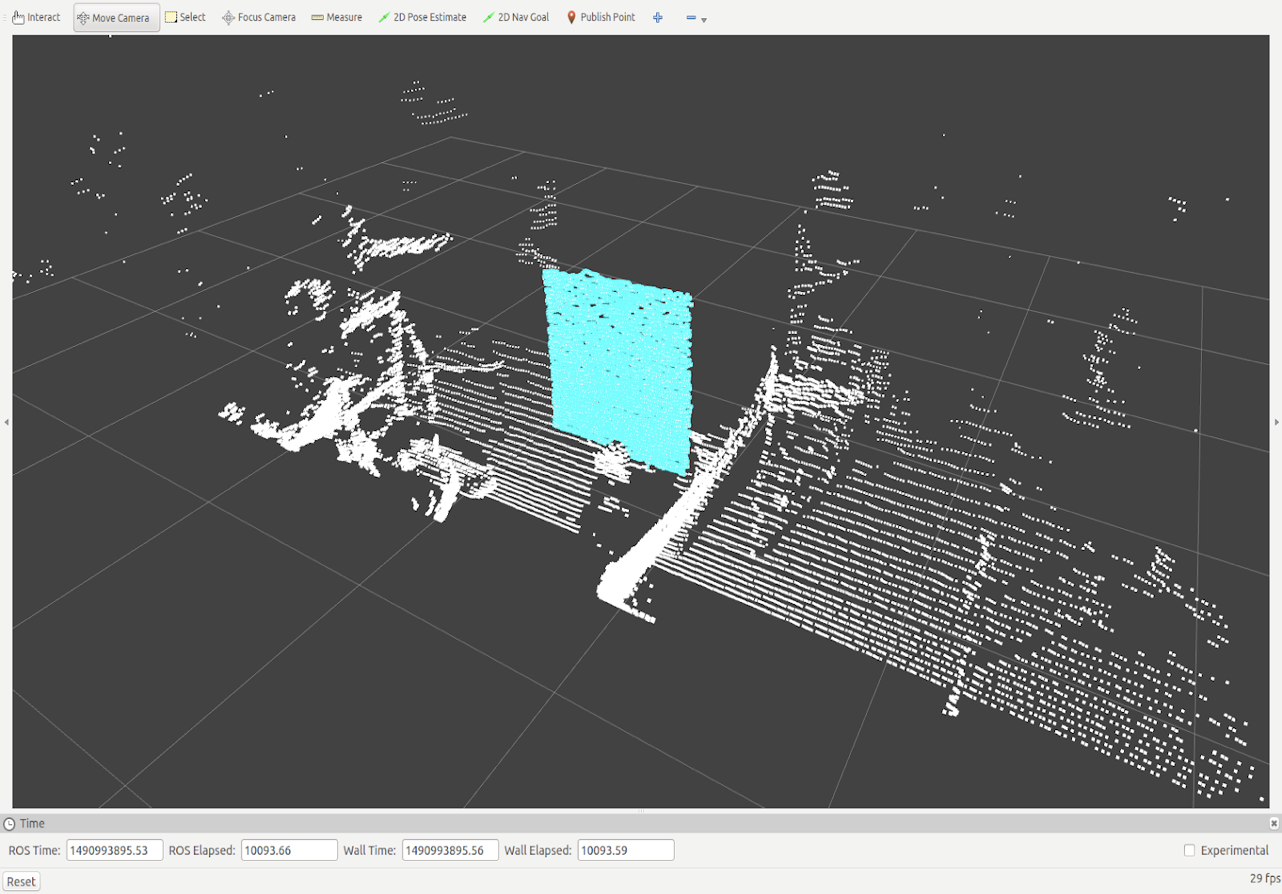

## Build a simple virtual world

### Add something into the world

In [2]:
%%file ./src/create_points.m
function [points, colors]  = create_points()
    [X, Y, Z] = meshgrid([-0.5, 0, 0.5], [-0.5, 0, 0.5], [-0.5, 0. 0.5]);
    points = [X(:), Y(:), Z(:)];
    colors = jet(size(points, 1));
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/create_points.m'.


Here we are setting a function that takes the points in space and colors to colormap the camera view. [x,y,z] is a matrix designed with meshgrid function to fit the points in the camera view.

### Plot the points

In [3]:
%%file ./src/plot_points.m
function plot_points(points, colors, sz, varargin)
    if ~exist('sz', 'var')
        sz = 50;
    end
        
    scatter3(points(:, 1), points(:, 2), points(:, 3), sz, colors, varargin{:});
    daspect([1 1 1])
    axis normal
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/plot_points.m'.


### Set up a pair of cameras

In [4]:
%%file ./src/preset_cameras.m
function [cam1, cam2]= preset_cameras()

    r     = 5;
    focal_length = 0.06;
    width = 256;
    height = 256;
    
    alpha = pi/6;
    beta  = pi/6;
    cam1 = struct('position', [r * cos(beta) * cos(alpha) ,  r* cos(beta) * sin(alpha), r * sin(beta)], ...
        'target', [0, 0, 0], ...
        'up', [0, 0, 1], ....
        'focal_length', focal_length, ...
        'film_width', 0.035, ...
        'film_height',0.035, ...
        'width', width, ...
        'height', height);
        
    alpha = pi/3;
    beta  = pi/6;
    cam2 = struct('position', [r * cos(beta) * cos(alpha) ,  r* cos(beta) * sin(alpha), r * sin(beta)], ...
        'target', [0, 0, 0], ...
        'up', [0, 0, 1], ....
        'focal_length', focal_length, ...
        'film_width', 0.035, ...
        'film_height',0.035, ...
        'width', width, ...
        'height', height);
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/preset_cameras.m'.


Here the code is relatively strightforward. We are setting up two cameras with initial position and possible orientation with preset rotational matrix. With set focal length, width, height and so on. 

### Plot camera

In [5]:
%%file ./src/camera_coordinate_system.m
function [xcam, ycam, zcam, origin] = camera_coordinate_system(cam)
    % the axis of camera coordinate system
    % principal axis
    zcam = cam.target - cam.position;

    % x aixs should pend to principal axis and up direction
    xcam = cross(zcam, cam.up);

    % y axis should pend to principal axis and principal axis
    ycam = cross(zcam, xcam);

    % normalize to unit vector
    zcam = zcam ./ norm(zcam);
    xcam = xcam ./ norm(xcam);
    ycam = ycam ./ norm(ycam);
    
    origin = cam.position;
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/camera_coordinate_system.m'.


In [6]:
%%file ./src/plot_camera.m
function plot_camera(cam, label, color)

% parse inputs
if ~isempty(label)
   % add label
    text(cam.position(1), cam.position(2), cam.position(3), label);
end

if ~exist('color', 'var')
    color = [0.75, 0.75, 0.75];
end

% compute the camera coordinate system
[xcam, ycam, zcam, origin] = camera_coordinate_system(cam);

% the four corners of the rectangle 
% on the plane through focal points
d = norm(cam.target-cam.position);
x = 0.5 * cam.film_width * d / cam.focal_length;
y = 0.5 * cam.film_height * d / cam.focal_length;

P1 = origin + x * xcam + y * ycam + d * zcam;
P2 = origin + x * xcam - y * ycam + d * zcam;
P3 = origin - x * xcam - y * ycam + d * zcam;
P4 = origin - x * xcam + y * ycam + d * zcam;

% function to draw a line segment (p1, p2)
connect=@(p1, p2) plot3([p1(1), p2(1)], [p1(2), p2(2)], [p1(3), p2(3)], ...
    'color', color);

% plot line connect camera and target
connect(cam.position, cam.target);

% plot line connect P1, P2, P3, P4
patch('Faces', [1, 2, 3, 4, 1], 'Vertices', [P1;P2;P3;P4], ...
   'EdgeColor', color, 'Facecolor', color, 'Facealpha', 0.1);
% connect(P1, P2);
% connect(P2, P3);
% connect(P3, P4);
% connect(P4, P1);

% plot line connect camera to P1, P2, P3, P4
connect(cam.position, P1);
connect(cam.position, P2);
connect(cam.position, P3);
connect(cam.position, P4);


end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/plot_camera.m'.


# Show the virtual world

In [7]:
[points, colors] = create_points();
[cam1, cam2]= preset_cameras();
% disp('points : ') ; disp(points);
% disp('colors : ') ; disp(colors);
disp('camera 1: '); disp(cam1);
disp('camera 2: ');  disp(cam2);

camera 1: 
        position: [3.7500 2.1651 2.5000]
          target: [0 0 0]
              up: [0 0 1]
    focal_length: 0.0600
      film_width: 0.0350
     film_height: 0.0350
           width: 256
          height: 256

camera 2: 
        position: [2.1651 3.7500 2.5000]
          target: [0 0 0]
              up: [0 0 1]
    focal_length: 0.0600
      film_width: 0.0350
     film_height: 0.0350
           width: 256
          height: 256



In [8]:
%%file ./src/lookthrough.m
function lookthrough(cam)
    set(gca, 'cameraUpVector', cam.up);
    set(gca, 'cameraPosition', cam.position);
    set(gca, 'cameraTarget', cam.target);
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/lookthrough.m'.


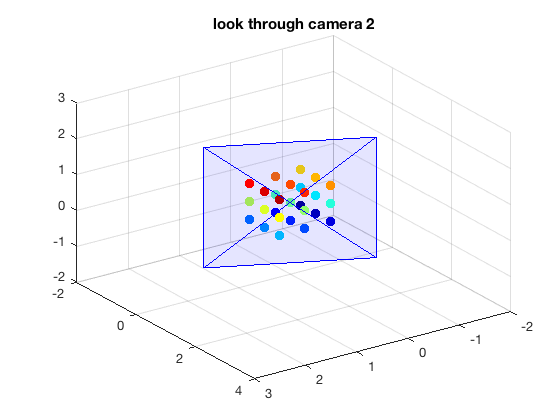

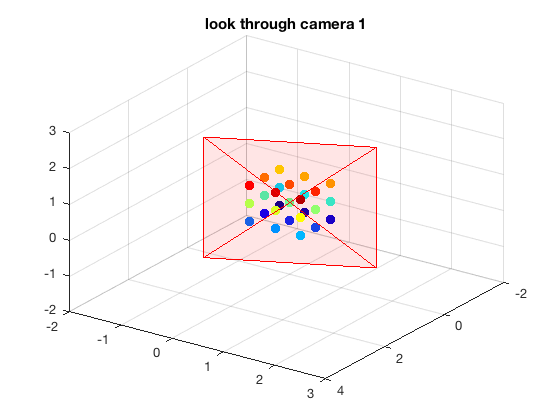

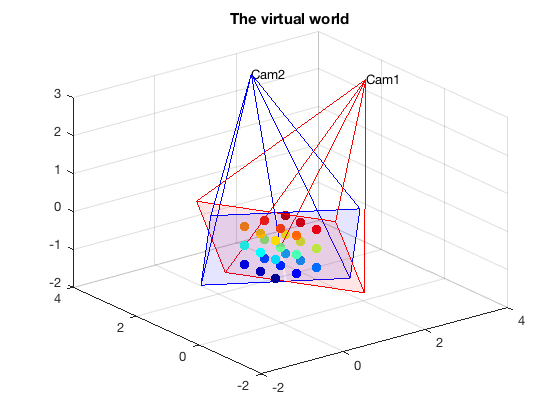

In [9]:
figure;

plot_points(points, colors, 50, 'filled'); 
hold on; 
plot_camera(cam1, 'Cam1', [1 0 0]);
hold on; 
plot_camera(cam2, 'Cam2', [0 0 1]); 
title('The virtual world')

figure;
plot_points(points, colors, 50, 'filled'); 
hold on; 
plot_camera(cam1, '', [1 0 0]);
lookthrough(cam1);
title('look through camera 1')

figure;
plot_points(points, colors, 50, 'filled'); 
hold on; 
plot_camera(cam2, '', [0 0 1]);
lookthrough(cam2);
title('look through camera 2')

## Camera Model

- The camera model describes the mathmatical relationship between a coordinate of a point in spatial frame with respect to its projection on the image plane with an ideal logic camera.
First to create a logic camera model in space, we need to create a 3D orthogonal coordinate system with a preset origin and a location of camera aperture. Then the image projecting from the object to the camera is a projected image through the aperture of the camera which should be flipped real image of the model. 
- Set a point R as the intersection of the optical axis and the image plane. The intersection should take in consideration of the focal length as well. 
- the color mapping or real image mapping is mapped according to the points taken in from the model projection. In the real case will be constructed with pixels of the reflection from the real object, but for the purpose of the simulation, the points are color mapped. 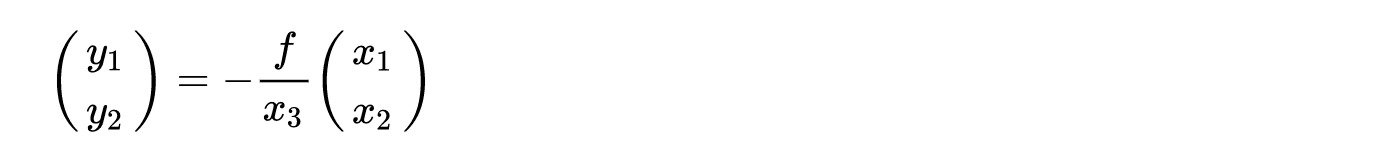
- this is the method we can map the 2D coordinates in the perspective projection with a 180 degrees rotation of the real image. 



In [10]:
%%file ./src/ExtrinsicsMtx.m
function M = ExtrinsicsMtx(cam)
[xcam, ycam, zcam, origin] = camera_coordinate_system(cam);
% rotation matrix
R = [xcam(:) ycam(:) zcam(:)];
M = [R; -origin * R];
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/ExtrinsicsMtx.m'.


### Camera calibration matrix

(See slide page 4)

In [11]:
%%file ./src/IntrinsicsMtx.m
function K = IntrinsicsMtx(cam)
    cx = (cam.width+1) * 0.5;
    cy = (cam.height+1) * 0.5;

    fx = cam.focal_length * cam.width / cam.film_width;
    fy = cam.focal_length * cam.height / cam.film_height;

    K = [fx, 0, 0; 0, fy, 0; cx, cy, 1];
end


Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/IntrinsicsMtx.m'.


### Camera matrix

(See slide page 7)

In [12]:
%%file ./src/CameraMtx.m
function P = CameraMtx(cam)       
    M = ExtrinsicsMtx(cam);
    K = IntrinsicsMtx(cam);
    P = M * K;
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/CameraMtx.m'.


### Generate the image pair

In [13]:
%%file ./src/world2image.m
function points2d = world2image(cam, points3d) 
    P = CameraMtx(cam);
    pt = [reshape(points3d, [], 3) ones(numel(points3d)/3, 1)]; 
    pt = pt * P;
    x = pt(:, 1) ./ pt(:, 3);
    y = pt(:, 2) ./ pt(:, 3);
    points2d = [x y];
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/world2image.m'.


In [14]:
%%file ./src/setcolor.m
function Io = setcolor(I, points2d, colors, R)
Io = I;
h  =  size(I, 1);
w  =  size(I, 2);
np = size(points2d, 1); % number of pixels
for i=1:np
    x = points2d(i, 1);
    y = points2d(i, 2);
    
    r1 = max(1, floor(y-R));
    r2 = min(h, ceil(y+R));
    c1 = max(1, floor(x-R));
    c2 = min(w, ceil(x+R));
    
    % fill an circle area
    for r = r1:r2
        for c=c1:c2
            if (r-y).^2 + (c-x).^2 < R.^2
                Io(r, c, :) = colors(i, :);
            end
        end
    end           
end
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/src/setcolor.m'.


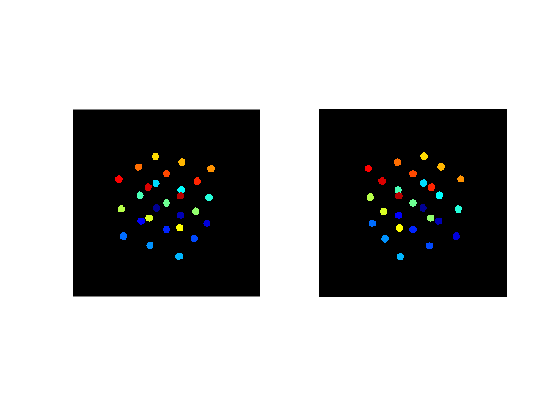

In [15]:
dilate = 5;

px1 = world2image(cam1, points);
px2 = world2image(cam2, points);
I1 = setcolor( zeros(cam1.height, cam1.width, 3), px1, colors, dilate);
I2 = setcolor( zeros(cam2.height, cam2.width, 3), px2, colors, dilate);

figure
subplot(1,2,1); imshow(I1);
subplot(1,2,2); imshow(I2);


## Triangulation
Given the cameras and point pairs, reconstruct the 3D positions in world coordinates of the point pairs.

### Linear triangluation method

- Triangulation is the method we use to determine a point in space given the image projection from the logic camera. Or in another word, triangulation can also be called as reconstruction. The theory behind triangulation is simple. If an image contains two or more correspongding points, this set of points can line up and intersect to formulate a way to calculate the position of all points on the plane. There are many possible cases for the property of the triangulation method. 
- singularity
methods could potentially fail to correctly estimate the 3D points lie in the space of the image plane.
- invariance
Sometimes, the coordinate of certain points could be independent to the 2D system and resulting in a x set of different prediction of points. 

In [16]:
%%file triangulate.m
function points3d = triangulate(points1, points2, P1, P2)
    np = size(points1, 1);
    points3d = zeros(np, 3);
    
    # iterate over point paris
    for i=1:np
        points3d(i, :)= triangulationOnePoint(points1(i, :)', points2(i, :)', P1', P2');
    end
end

function point3d = triangulationOnePoint(point1, point2, P1, P2)
% construct A
A = zeros(4, 4);
A(1:2,:) = point1 * P1(3,:) - P1(1:2,:);
A(3:4,:) = point2 * P2(3,:) - P2(1:2,:);

# solve the optimization problem: min_x ||Ax|| s.t ||x|| = 1
[~,~,V] = svd(A);
X = V(:, end);
X = X/X(end);

# homogenous -> inhomogenous
point3d = X(1:3)';
end

Created file '/Volumes/HDD/EECS531-TA-S18/eecs531-s18-jxc761/mvg/triangulate.m'.


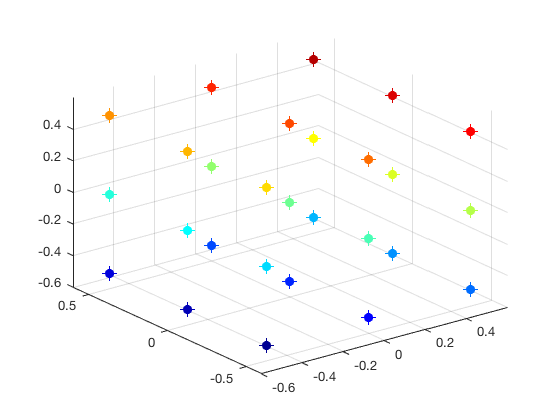

In [17]:

[points, colors] = create_points();
P1 = CameraMtx(cam1);
P2 = CameraMtx(cam2);
px1 = world2image(cam1, points);
px2 = world2image(cam2, points);
rec = triangulate(px1, px2, P1, P2);

scatter3(points(:, 1), points(:, 2), points(:, 3), 100, colors, '+');
hold on
scatter3(rec(:, 1), rec(:, 2), rec(:, 3), 50, colors, 'filled');
xlim([-0.6, 0.6]);
ylim([-0.6, 0.6]);
zlim([-0.6, 0.6]);

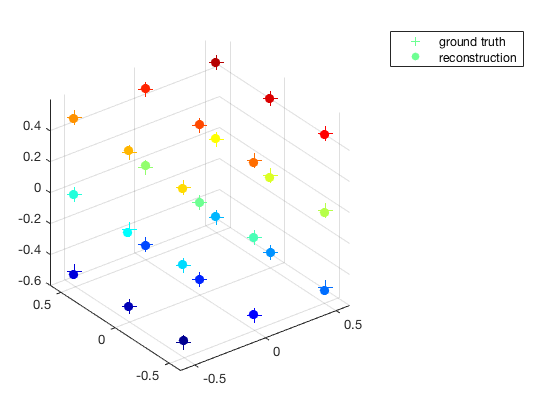

In [18]:
% add noise
sigma = 0.75;
px1 = px1+sigma*rand(size(px1));
px2 = px2+sigma*rand(size(px2));
rec = triangulate(px1, px2, P1, P2);
scatter3(points(:, 1), points(:, 2), points(:, 3), 100, colors, '+');
hold on
scatter3(rec(:, 1), rec(:, 2), rec(:, 3), 50, colors, 'filled', 'o');
xlim([-0.6, 0.6]);
ylim([-0.6, 0.6]);
zlim([-0.6, 0.6]);
legend({'ground truth', 'reconstruction'})
daspect([1, 1, 1])